# Decision Tree Basics

Decision Trees are supervised learning models used for both classification and regression tasks. They work by recursively splitting the dataset based on feature values to reduce impurity.

## How It Works
- For **classification**, trees use metrics like **Gini impurity** or **Entropy** to decide the best split.
- For **regression**, they typically minimize **Mean Squared Error (MSE)**.

The tree starts at a root and splits the data into branches based on feature thresholds, creating a path to a decision leaf.

> ## 🔍 How Splitting Works in Decision Trees

### 🧪 Classification: Gini Impurity and Entropy

To decide the best feature and threshold to split on, decision trees evaluate **impurity** at each possible split. Lower impurity means a better split.

#### ✅ Gini Impurity

Gini measures how often a randomly chosen element would be incorrectly labeled if it was randomly labeled according to the distribution in the node:

$$
\text{Gini} = 1 - \sum_{i=1}^{C} p_i^2
$$

Where:
- $ C $ is the number of classes  
- $ p_i $ is the proportion of class $ i $

#### ✅ Entropy (Information Gain)

Entropy measures the disorder or uncertainty of the classes:

$$
\text{Entropy} = - \sum_{i=1}^{C} p_i \log_2(p_i)
$$

A split is chosen to **minimize the weighted impurity** (Gini or Entropy) of the resulting child nodes.

---

### 📈 Regression: Mean Squared Error (MSE)

In regression trees, the quality of a split is measured using **Mean Squared Error**, which calculates how far predictions are from actual values.

#### ✅ MSE Formula

$$
\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \bar{y})^2
$$

Where:
- $ y_i $ are the true values  
- $ \bar{y} $ is the mean value of the current region  
- $ n $ is the number of samples

The best split minimizes the **total MSE** across the child nodes.

---

### 🎯 Final Prediction

- **Classification Tree**: predicts the **majority class** in a leaf.
- **Regression Tree**: predicts the **mean target value** of samples in a leaf.


## Key Hyperparameters
- `max_depth`: Maximum number of splits down any path.
- `min_samples_split`: Minimum samples needed to split a node.
- `min_samples_leaf`: Minimum samples in a leaf node.
- `criterion`: Splitting metric (`gini`, `entropy`, `squared_error`).

In [11]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris, fetch_california_housing
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
from sklearn.model_selection import train_test_split
import seaborn as sns
%matplotlib inline

In [12]:
# Load classification dataset (Iris as placeholder for visualization)
iris = load_iris(as_frame=True)
X_cls = iris.data
y_cls = iris.target
Xc_train, Xc_test, yc_train, yc_test = train_test_split(X_cls, y_cls, test_size=0.3, random_state=42)

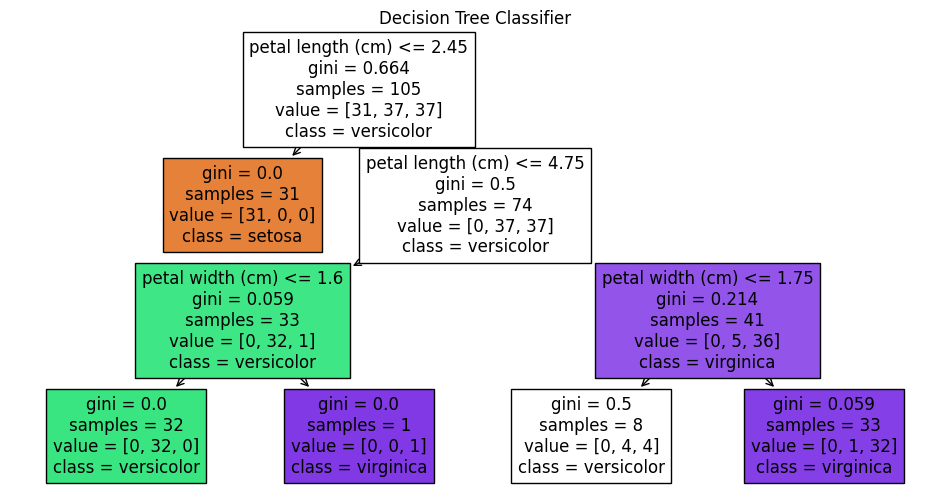

In [13]:
# Train a Decision Tree Classifier
clf = DecisionTreeClassifier(max_depth=3, random_state=42)
clf.fit(Xc_train, yc_train)
plt.figure(figsize=(12, 6))
plot_tree(clf, feature_names=iris.feature_names, class_names=iris.target_names, filled=True)
plt.title('Decision Tree Classifier')
plt.show()

In [14]:
# Load regression dataset (California housing)
housing = fetch_california_housing(as_frame=True)
X_reg = housing.data
y_reg = housing.target
Xr_train, Xr_test, yr_train, yr_test = train_test_split(X_reg, y_reg, test_size=0.3, random_state=42)

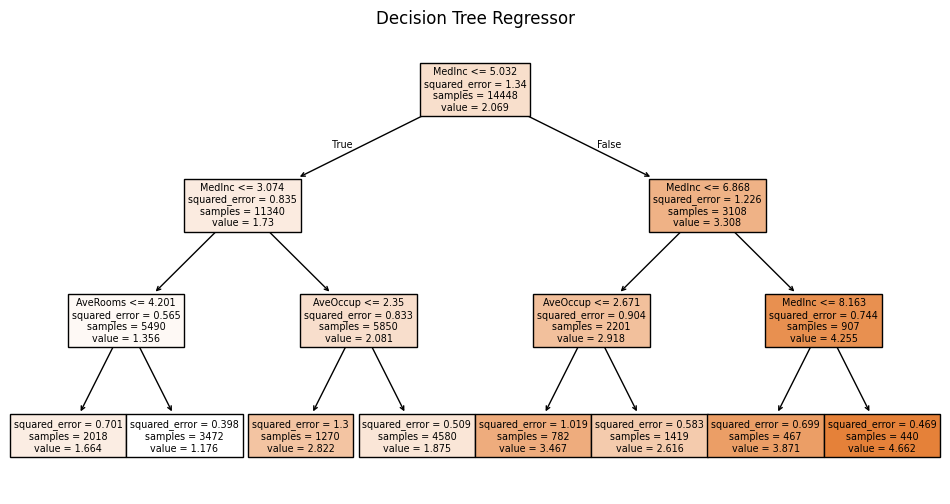

In [15]:
# Train a Decision Tree Regressor
reg = DecisionTreeRegressor(max_depth=3, random_state=42)
reg.fit(Xr_train, yr_train)
plt.figure(figsize=(12, 6))
plot_tree(reg, feature_names=housing.feature_names, filled=True)
plt.title('Decision Tree Regressor')
plt.show()

## Dataset Summaries

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


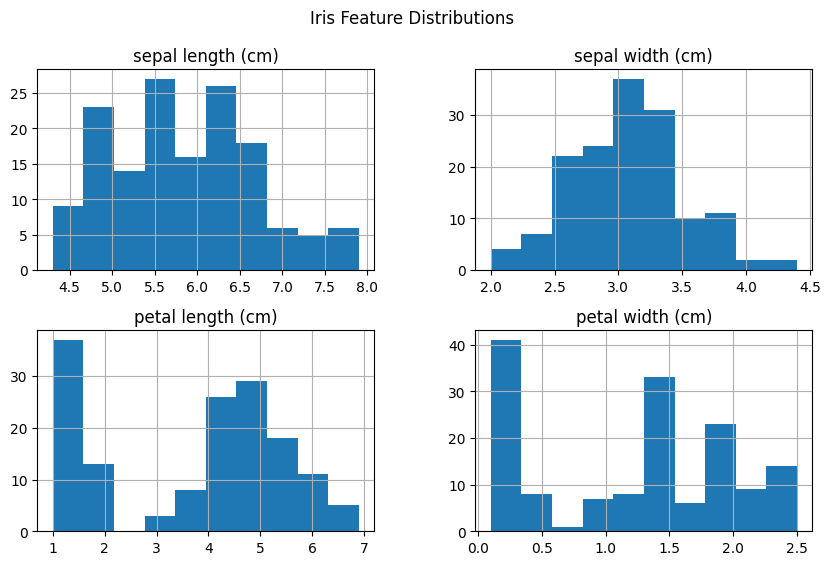

In [16]:
# Iris dataset
display(X_cls.describe())
X_cls.hist(figsize=(10,6))
plt.suptitle('Iris Feature Distributions')
plt.show()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000


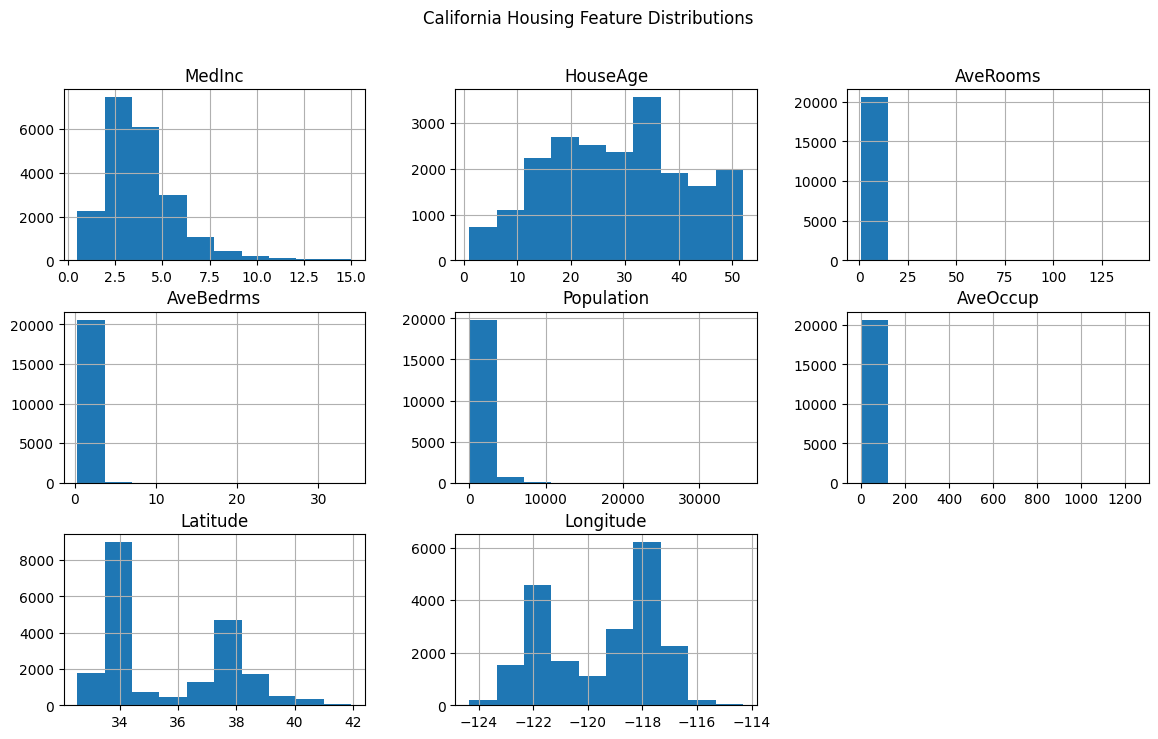

In [17]:
# California Housing dataset
display(X_reg.describe())
X_reg.hist(figsize=(14,8))
plt.suptitle('California Housing Feature Distributions')
plt.show()